In [ ]:
import gzip
from pprint import pprint
from imp import reload
import pandas
import urllib.request

# Installation

The Python Genome Browser can be installed from PyPi using pip:
    
`pip install pygbrowse`    

In [1]:
import pygbrowse

# Organization

The pygbrowse package is comprised of three modules:

* plots - Subplot classes and a master plotting class
    * BedPlot - Renders discrete genomic intervals such as ChIP-seq peaks, sequence variants, or other regions of interest as colored boxes. Can be colored according to a data field.
    * WigPlot - Named after the wiggle format (though this is, ironically, not currently supported as a data source), this class renders continuous data vectors that have one value (possibly zero) per base pair.
    * InteractionPlot - Renders long-range genomic interactions such as Hi-C, PLAC-seq, Hi-ChIP, etc.
    * GeneModels - Renders annotated transcripts and subtranscript elements.
* datasources
    * Objects that wrap disparate data sources and allow efficient retrieval by the plotting objects.
* utilities
    * Miscellaneous functions used internally by the plots and datasources modules. 
    

Plots are rendered by an instance of the GenomePlotter class. A GenomePlotter is initialized with a collection of subplot objects representing the different data layers to be plotted and can then be used to render plots over different genomic regions using the same data and settings. 



# Demonstration

For this demo we'll be rendering peaks and read profiles for a subset of data from the publication "Analysis of Genetically Diverse Macrophages Reveals Local and Domain-wide Mechanisms that Control Transcription Factor Binding and Function" by Verena Link et al. (<https://doi.org/10.1016/j.cell.2018.04.018>). The raw data is available in GEO under accession number GSE109965 (<http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE109965>) but we will be using tag directories as generated by HOMER (<http://homer.ucsd.edu>) from the read alignments. 

# Gene Models

First we'll demonstrate how to plot gene models (coordinates of transcripts and sub-transcript features such as exons, introns, and UTRs). This feature is based on the display conventions of the UCSC genome browser and uses the same visual representations.

Future improvements:
1. Filter the data to exclude more predicted / spurious transcripts.
2. Move the gene name from above the gene to alonside the gene, a la UCSC genome browser to prevent collisions
3. Cleanup instances of overlapping feature icons.

## The first step is to download a suitable representation of the gene models. Currently we only support GFF3 files from Ensembl but this may be extended in the future.

In [24]:
gff3_filename = 'Mus_musculus.GRCm38.92.gff3.gz'

urllib.request.urlretrieve ('ftp://ftp.ensembl.org/pub/release-92/gff3/mus_musculus/{}'.format(gff3_filename),
                            'data/{}'.format(gff3_filename))

('data/Mus_musculus.GRCm38.92.gff3.gz',
 <email.message.Message at 0x7f8abe50dbe0>)

## Next we need to create a an instance of the GeneModels class and pass it the path to a GFF3 file.

In [54]:
reload(pygbrowse.plots)
# %time gene_models = pygbrowse.plots.GeneModels(os.path.join('data', 'test.gff3'))
%time gene_models = pygbrowse.plots.GeneModels(os.path.join('data', gff3_filename))

2018-Jul-25 11:37:47	Loading gene model information from data/Mus_musculus.GRCm38.92.gff3.gz. This may take a few minutes ...


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [53]:
gene_models.components

0: contig=chr1, start=3214481, end=3216021, strand=-, type=three_prime_UTR, Parent=transcript:ENSMUST00000070533
1: contig=chr1, start=3216021, end=3216968, strand=-, type=CDS, ID=CDS:ENSMUSP00000070648, Parent=transcript:ENSMUST00000070533, protein_id=ENSMUSP00000070648
2: contig=chr1, start=3421701, end=3421901, strand=-, type=CDS, ID=CDS:ENSMUSP00000070648, Parent=transcript:ENSMUST00000070533, protein_id=ENSMUSP00000070648
3: contig=chr1, start=3670551, end=3671348, strand=-, type=CDS, ID=CDS:ENSMUSP00000070648, Parent=transcript:ENSMUST00000070533, protein_id=ENSMUSP00000070648
4: contig=chr1, start=3671348, end=3671498, strand=-, type=five_prime_UTR, Parent=transcript:ENSMUST00000070533
5: contig=chr1, start=3999556, end=3999617, strand=-, type=CDS, ID=CDS:ENSMUSP00000146439, Parent=transcript:ENSMUST00000208660, protein_id=ENSMUSP00000146439
6: contig=chr1, start=4007655, end=4007737, strand=-, type=CDS, ID=CDS:ENSMUSP00000146439, Parent=transcript:ENSMUST00000208660, protein_id

## Finally we initialize a GenomePlotter object and call its .visualize() method with the genomic coordinates we want to display.

In [51]:
x.contig_names

[]

In [39]:
x

In [55]:
x = gene_models.components
x.overlapping('chr18', 10e6, 20e6)

277140: contig=chr18, start=12477326, end=12477453, strand=+, type=CDS, ID=CDS:ENSMUSP00000089703, Parent=transcript:ENSMUST00000092070, protein_id=ENSMUSP00000089703
277564: contig=chr18, start=14721166, end=14721293, strand=+, type=CDS, ID=CDS:ENSMUSP00000042590, Parent=transcript:ENSMUST00000040860, protein_id=ENSMUSP00000042590
276810: contig=chr18, start=10795689, end=10795851, strand=+, type=CDS, ID=CDS:ENSMUSP00000131712, Parent=transcript:ENSMUST00000165555, protein_id=ENSMUSP00000131712
276825: contig=chr18, start=10795689, end=10795851, strand=+, type=CDS, ID=CDS:ENSMUSP00000114289, Parent=transcript:ENSMUST00000124288, protein_id=ENSMUSP00000114289
276786: contig=chr18, start=10795689, end=10795851, strand=+, type=CDS, ID=CDS:ENSMUSP00000054428, Parent=transcript:ENSMUST00000052838, protein_id=ENSMUSP00000054428
276835: contig=chr18, start=10800055, end=10800248, strand=+, type=CDS, ID=CDS:ENSMUSP00000122879, Parent=transcript:ENSMUST00000150000, protein_id=ENSMUSP0000012287

No handles with labels found to put in legend.


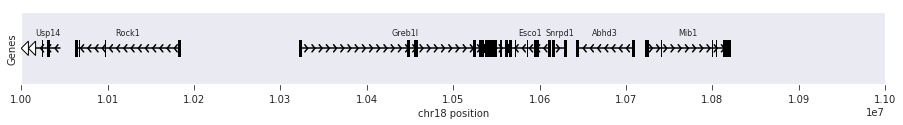

In [56]:
reload(pygbrowse.plots)
genes_only_plotter = pygbrowse.plots.GenomePlotter([[gene_models]])
fig = genes_only_plotter.visualize('chr18', 1e7, 1.1e7)

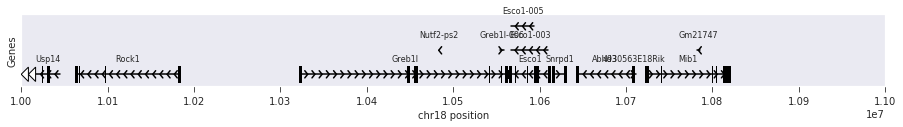

In [6]:
fig = pygbrowse.plots.visualize(plot_objects=[[gene_models]], chrom='chr18', ws=10000000, we=11*1e6)

## Continuous data

## Add convenience function for generating chromosome dicts from a single region (chrom, start end`)

In [7]:
reload(pygbrowse)
reload(pygbrowse.datasources)
reload(pygbrowse.utilities)

tag_directory = '/home/dskola/glass_data/mm10/BMDM/RNA/C57_BMDM_polyA_RNA_notx_BC_16_03_08/'
rnaseq_data = pygbrowse.datasources.TagDirectory(tag_directory)

## We can query the data backend

In [8]:
%time res = rnaseq_data.query('chr18', 10009970, 10010000)
print(res)

CPU times: user 48 ms, sys: 16 ms, total: 64 ms
Wall time: 259 ms
10009970    0.000000
10009971    0.000000
10009972    0.000000
10009973    0.000000
10009974    2.380023
10009975    0.000000
10009976    0.000000
10009977    2.380023
10009978    0.000000
10009979    0.000000
10009980    2.380023
10009981    0.000000
10009982    4.760047
10009983    7.140070
10009984    0.000000
10009985    4.760047
10009986    0.000000
10009987    0.000000
10009988    2.380023
10009989    0.000000
10009990    4.760047
10009991    0.000000
10009992    0.000000
10009993    0.000000
10009994    0.000000
10009995    0.000000
10009996    0.000000
10009997    0.000000
10009998    0.000000
10009999    0.000000
dtype: float64


## Plot

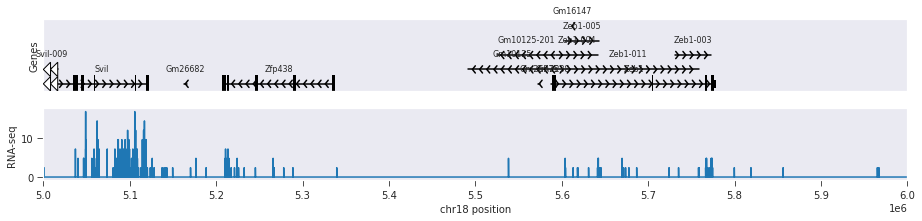

In [9]:
reload(pygbrowse.utilities)
reload(pygbrowse.datasources)
reload(pygbrowse.plots)

rnaseq_data = pygbrowse.datasources.TagDirectory(tag_directory)

rnaseq_plot = pygbrowse.plots.WigPlot(rnaseq_data, label='RNA-seq', scale_vector_to_plot=False)
fig = pygbrowse.plots.visualize(plot_objects=[[gene_models], 
                                              [rnaseq_plot]], chrom='chr18', ws=5000000, we=6*1e6)

In [10]:
import numpy
a = {'chr18':pandas.Series(numpy.arange(5000000, 6000000), index=numpy.arange(5000000, 6000000))}

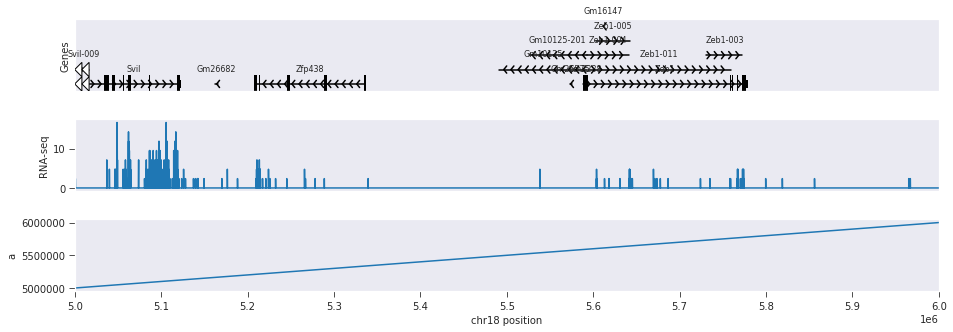

In [11]:
a_plot = pygbrowse.plots.WigPlot(a, label='a', scale_vector_to_plot=False)
fig = pygbrowse.plots.visualize(plot_objects=[[gene_models], 
                                              [rnaseq_plot],
                                             [a_plot]], chrom='chr18', ws=5000000, we=6*1e6)

In [12]:
a_plot = pygbrowse.plots.WigPlot(a, label='a', scale_vector_to_plot=False)

In [13]:
reload(pygbrowse.plots)
placseq_interaction_fname = '/home/dskola/glass_home/projects/coupled_peaks/placseq/significance_table_all_strains.txt'

placseq_interaction_plot = pygbrowse.plots.InteractionPlot(pandas.read_csv(placseq_interaction_fname, sep=','), bin_size=5000)

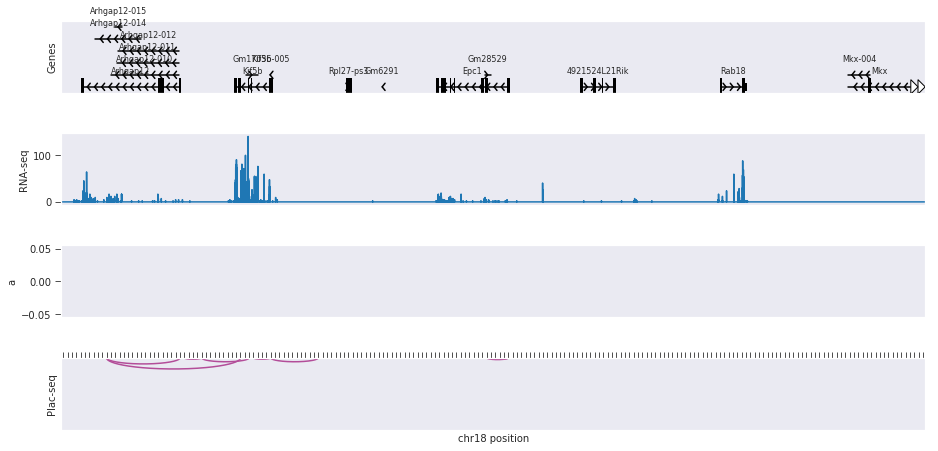

In [14]:
# %%prun

fig = pygbrowse.plots.visualize(plot_objects=[[gene_models],
                                              [rnaseq_plot],
                                              [a_plot], 
                                              [placseq_interaction_plot]],
                                chrom='chr18', ws=6000000, we=7*1e6)


## Intervals (BED files)

In [15]:
reload(pygbrowse.datasources)
reload(pygbrowse.plots)

pu1_peak_data_bed = pygbrowse.datasources.IntervalData('/home/dskola/glass_home/projects/coupled_peaks/moremerged/peaks/pooled_pu1_notx_c57.bed',
                                                  format='bed')

pu1_peak_data_homer = pygbrowse.datasources.IntervalData('/home/dskola/glass_home/projects/coupled_peaks/moremerged/peaks/pooled_pu1_notx_c57.homer',
                                                  format='homer')

pu1_peak_data_annotated = pygbrowse.datasources.IntervalData('/home/dskola/glass_home/projects/coupled_peaks/moremerged/peaks/pooled_pu1_notx_c57_annotated.homer',
                                                  format='homer_annotated')

2018-Jul-24 16:51:38	Guessing /home/dskola/glass_home/projects/coupled_peaks/moremerged/peaks/pooled_pu1_notx_c57.bed is a filename
2018-Jul-24 16:51:40	Guessing /home/dskola/glass_home/projects/coupled_peaks/moremerged/peaks/pooled_pu1_notx_c57.homer is a filename
2018-Jul-24 16:51:43	Guessing /home/dskola/glass_home/projects/coupled_peaks/moremerged/peaks/pooled_pu1_notx_c57_annotated.homer is a filename


## Interface decision:
* Should we automate the data backend generation by allowing users to specify a flexible data source (string filename, data object plus parameter to specify type where appropriate?

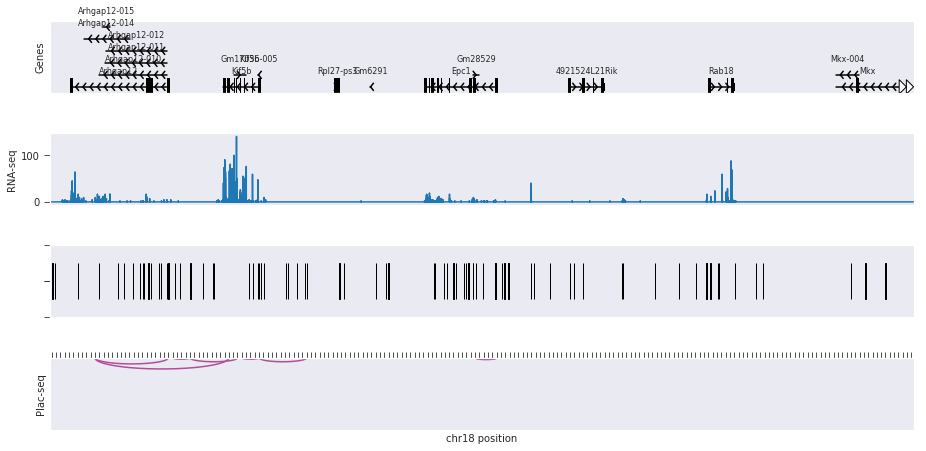

In [17]:
reload(pygbrowse.datasources)
reload(pygbrowse.plots)
pu1_peak_plot = pygbrowse.plots.BedPlot(pu1_peak_data_homer, label='Pu.1 peaks')


fig = pygbrowse.plots.visualize(plot_objects=[[gene_models],
                                              [rnaseq_plot],
                                              [pu1_peak_plot], 
                                              [placseq_interaction_plot]],
                                chrom='chr18', ws=6000000, we=7*1e6)

## Show how to construct your own custom plotting function that just takes coordinates.
    * Starting to feel like we should make the visualizer an object.
    
            * Create a visualization object with all the parameters, then that exposes a method that just takes chrom, start, end. That _is_ the custom plotting function.

# Create universal interface for continuous and interval data?